In [ ]:
import _03_determine_topology

# Larger batch size improved correlations
model = _03_determine_topology.run(epochs=24, batch_size=2*1024)

#### Correlations according to weight matrix

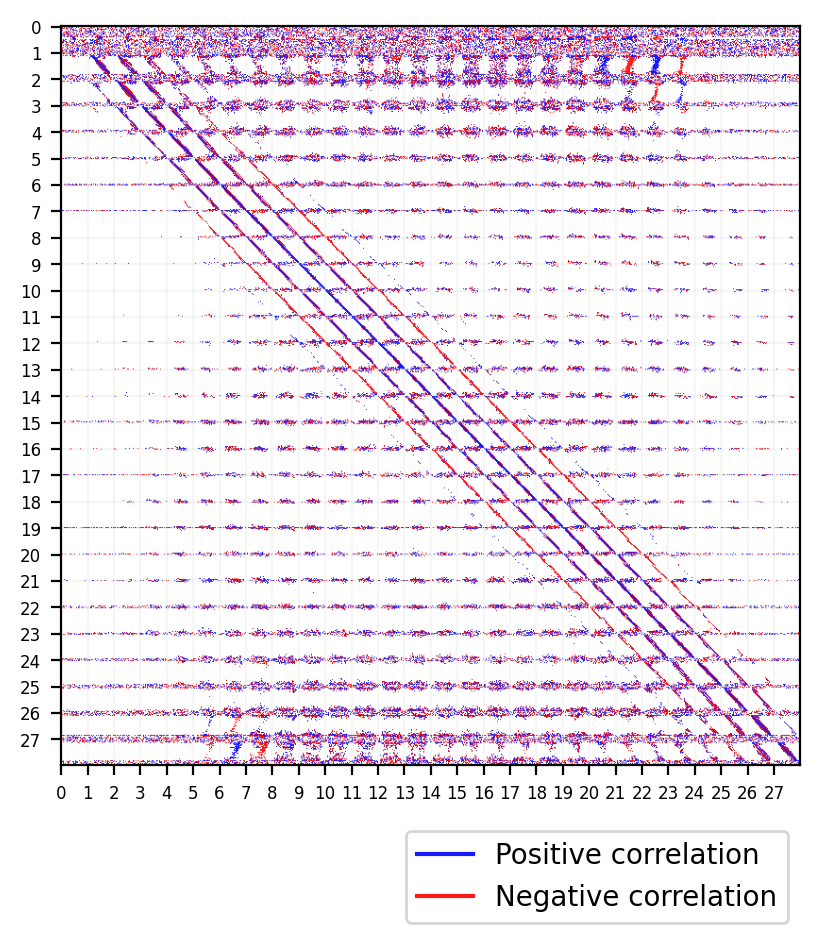

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import torch
import matplotlib
%config InlineBackend.figure_formats = "retina"

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Pixel positions undergo a fixed permutation to prevent
# structure from leaking into the model.
# Undo this permutation for visualization.
data = model.parameters().__next__().data.cpu()
data = data[model.unpermutation].T[model.unpermutation]

background = torch.ones_like(data)
image = torch.stack([background, background, background]).permute(1, 2, 0)

negative_color = torch.tensor([1.0, 0.1, 0.1])
positive_color = torch.tensor([0.1, 0.1, 1.0])
image[data < -0.02] *= negative_color
image[data > 0.02] *= positive_color

image = (image*255).byte()

image = PIL.Image.fromarray(image.numpy(), mode="RGB")
plt.imshow(image);

plt.xticks(np.arange(28)*28, np.arange(28), size=6)
plt.yticks(np.arange(28)*28, np.arange(28), size=6)
plt.grid(alpha=0.1)

plt.legend(handles=[
    matplotlib.lines.Line2D([0], [0], c=positive_color.tolist(), label="Positive correlation"),
    matplotlib.lines.Line2D([0], [0], c=negative_color.tolist(), label="Negative correlation"),
    ], bbox_to_anchor=(1.003, -0.07))

plt.savefig("images/_03_determine_topology1.png", bbox_inches="tight")